In [1]:
%pylab inline 
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import scipy

Populating the interactive namespace from numpy and matplotlib


In [2]:
all_data_df = pd.read_csv("all_2013_data.csv")
perc_breakfast=pd.read_csv("top_ten_breakfast.csv")

In [3]:
all_data_df.head()

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population
0,AL,139001,539664,224173,30308,15.489552,36.128358,4829479
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929
2,AZ,182501,646767,289520,23688,11.093333,28.773333,6624617
3,AR,89777,332497,166376,41946,13.308000,35.898667,2958663
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203


In [4]:
perc_breakfast.head(10)

,Unnamed: 0,State,% of WIC Participants,% of School Lunch Program Participants,% of School Breakfast Program Participants,% of Summer Food Participants,% Adults with Diabetes,% Obese Adults,State Population
0,31,NM,2.942270,10.559550,7.105098,1.073570,9.254545,25.078788,2085193
1,24,MS,3.064790,13.094010,6.932160,0.900056,14.657317,36.807317,2990482
2,43,TX,3.607650,12.520410,6.869920,0.681266,10.396063,28.702756,26473525
3,48,WV,2.503843,10.469931,6.312273,0.643741,13.943636,35.440000,1853231
4,17,KY,2.952475,12.107574,6.294704,0.458791,13.267500,34.230000,4400477
5,10,GA,2.899607,12.472466,6.090554,0.716649,12.686792,31.393711,9984938
6,36,OK,3.077342,11.369284,5.911980,0.293712,13.025974,34.453247,3852415
7,18,LA,3.022997,12.218177,5.741568,0.884316,12.893750,36.176563,4626402
8,40,SC,2.606748,10.026523,5.735090,1.178130,14.367391,35.139130,4767894
9,3,AR,3.034377,11.238083,5.623351,1.417735,13.308000,35.898667,2958663


In [5]:
breakfast = all_data_df[all_data_df.State.isin(['NM', 'MS', 'TX', 'WV', 'KY', 'GA', 'OK', 'LA', 'SC', 'AR'])][["State","School Breakfast Program Participants","Population"]]
breakfast

,State,School Breakfast Program Participants,Population
3,AR,166376,2958663
10,GA,608138,9984938
17,KY,276997,4400477
18,LA,265628,4626402
24,MS,207305,2990482
31,NM,148155,2085193
36,OK,227754,3852415
40,SC,273443,4767894
43,TX,1818710,26473525
48,WV,116981,1853231


In [25]:
breakfast["Population/10"]=breakfast["Population"]/10
breakfast=breakfast.sort_values("Population", ascending=True)
breakfast.head()

,State,School Breakfast Program Participants,Population,Population/10
48,WV,116981,1853231,185323.1
31,NM,148155,2085193,208519.3
3,AR,166376,2958663,295866.3
24,MS,207305,2990482,299048.2
36,OK,227754,3852415,385241.5


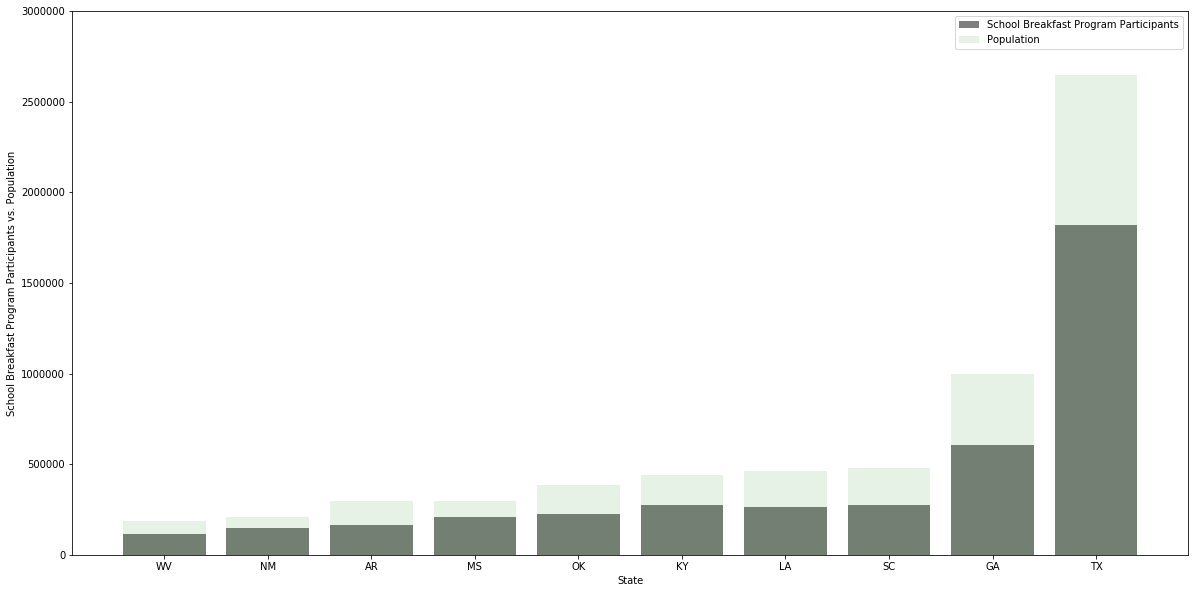

In [31]:
# Set x axis and tick locations
x_axis = np.arange(len(breakfast))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
p1 = plt.bar(x_axis, breakfast["School Breakfast Program Participants"], color='black', alpha=0.5, align="center")
p2 = plt.bar(x_axis, breakfast["Population/10"], color='green', alpha=0.1, align="center")
plt.xticks(tick_locations, breakfast["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("School Breakfast Program Participants vs. Population")
plt.ylim(0, 3000000)
# plt.ylim(0, 1600000)
plt.legend((p1[0], p2[0]), ("School Breakfast Program Participants", "Population"))
plt.show()


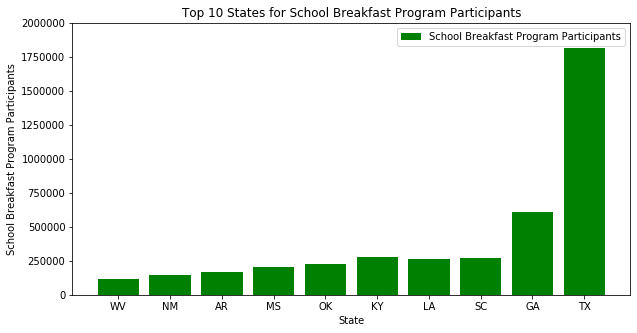

In [27]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
p1 = plt.bar(x_axis, breakfast["School Breakfast Program Participants"], color='green', alpha=1, align="center")
plt.xticks(tick_locations, breakfast["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("School Breakfast Program Participants")
plt.ylim(0, 2000000)
plt.legend(("School Breakfast Program Participants",))
plt.title("Top 10 States for School Breakfast Program Participants")
plt.show()

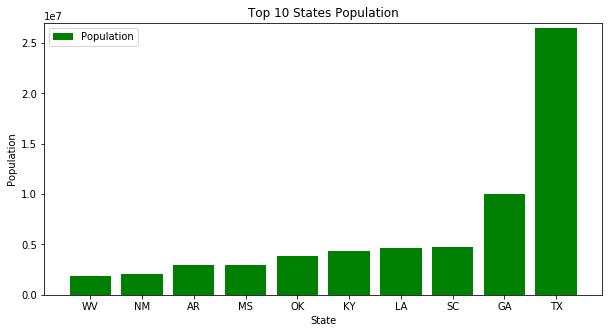

In [28]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
p1 = plt.bar(x_axis, breakfast["Population"], color='green', alpha=1, align="center")
plt.xticks(tick_locations, breakfast["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("Population")
plt.ylim(0, 27000000)
plt.legend(("Population",))
plt.title("Top 10 States Population")
plt.show()